In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.shape

(10000, 14)

In [6]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df['Exited'].value_counts()/df.shape[0]

0    0.7963
1    0.2037
Name: Exited, dtype: float64

<AxesSubplot:xlabel='Geography', ylabel='count'>

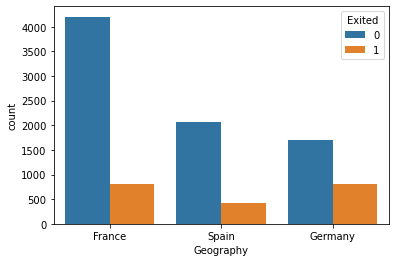

In [9]:
sns.countplot(x='Geography', hue = 'Exited',data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

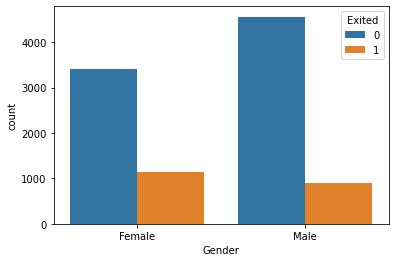

In [10]:
 sns.countplot(x='Gender', hue = 'Exited',data = df)

<AxesSubplot:xlabel='Surname'>

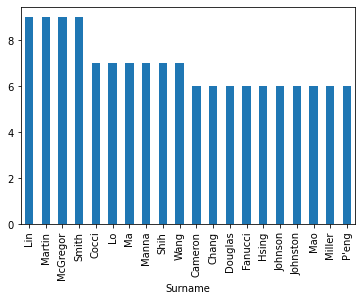

In [11]:
df.groupby('Surname')['Exited'].sum().nlargest(20).plot(kind='bar')

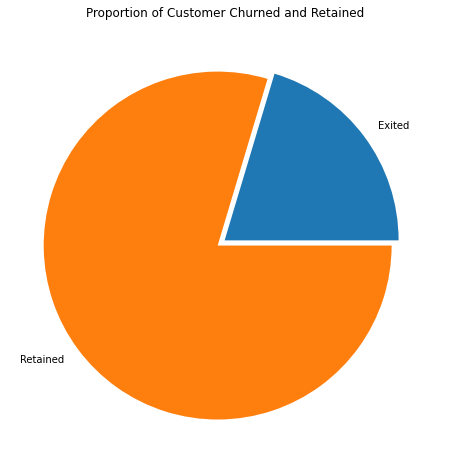

In [12]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.05)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels)
plt.title("Proportion of Customer Churned and Retained")
plt.show()

In [13]:
#So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. 
#Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of 
#interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

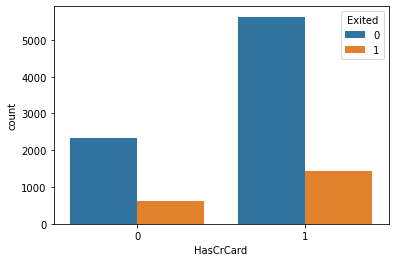

In [14]:
 sns.countplot(x='HasCrCard', hue = 'Exited',data = df)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

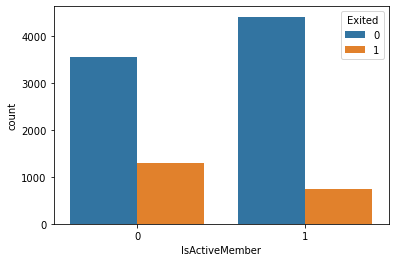

In [15]:
 sns.countplot(x='IsActiveMember', hue = 'Exited',data = df)

<AxesSubplot:xlabel='NumOfProducts'>

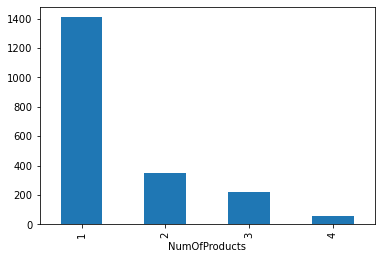

In [16]:
df.groupby('NumOfProducts')['Exited'].sum().plot(kind='bar')

<AxesSubplot:xlabel='Tenure'>

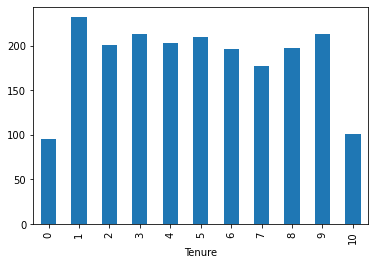

In [17]:
df.groupby('Tenure')['Exited'].sum().plot(kind='bar')

In [18]:
#Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the 
#population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) 
#in the areas where it has fewer clients.
#The proportion of female customers churning is also greater than that of male customers
#Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have 
#credit cards could prove this to be just a coincidence.Unsurprisingly the inactive members have a greater churn. 
#Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program. 
#implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

In [19]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [20]:
df = pd.get_dummies(df ,columns = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember'],drop_first = True )

In [21]:
df.groupby('Exited').agg(['mean','median'])

CreditScore               Age           Tenure              Balance  \
              mean median       mean median      mean median          mean   
Exited                                                                       
0       651.853196  653.0  37.408389   36.0  5.033279    5.0  72745.296779   
1       645.351497  646.0  44.837997   45.0  4.932744    5.0  91108.539337   

                  EstimatedSalary             ... NumOfProducts_2         \
           median            mean     median  ...            mean median   
Exited                                        ...                          
0        92072.68    99738.391772   99645.04  ...        0.532714    1.0   
1       109349.29   101465.677531  102460.84  ...        0.170839    0.0   

       NumOfProducts_3        NumOfProducts_4        HasCrCard_1         \
                  mean median            mean median        mean median   
Exited                                                                    
0             0.005777    0.0        0.000000    0.0    0.707146    1.0   
1             0.108002    0.0        0.029455    0.0    0.699067    1.0   

       IsActiveMember_1         
                   mean median  
Exited                          
0              0.554565    1.0  
1              0.360825    0.0  

[2 rows x 26 columns]

In [22]:
df.groupby('Exited').mean()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1
Exited,,,,,,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,99738.391772,0.212859,0.259199,0.572523,0.532714,0.005777,0.000000,0.707146,0.554565
1,645.351497,44.837997,4.932744,91108.539337,101465.677531,0.399607,0.202749,0.440844,0.170839,0.108002,0.029455,0.699067,0.360825


<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

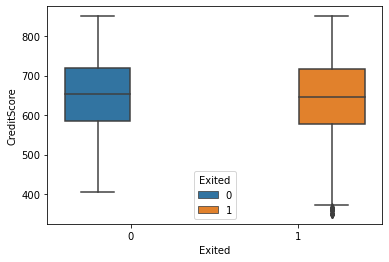

In [23]:
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df)

In [24]:
percentile25 = df['CreditScore'].quantile(0.25)
percentile75 = df['CreditScore'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df["CreditScore"]=np.where(df["CreditScore"]>upper_limit,upper_limit,np.where(df["CreditScore"]<lower_limit,lower_limit,df["CreditScore"]))

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

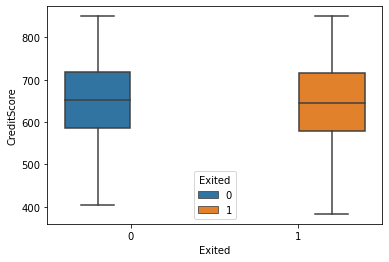

In [25]:
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df)

<AxesSubplot:xlabel='Exited', ylabel='Age'>

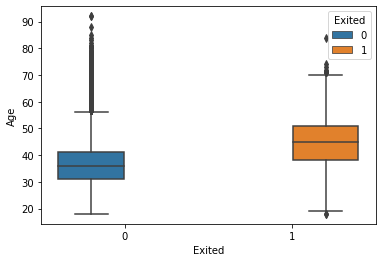

In [26]:
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df)

In [27]:
percentile25 = df['Age'].quantile(0.25)
percentile75 = df['Age'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df["Age"]=np.where(df["Age"]>upper_limit,upper_limit,np.where(df["Age"]<lower_limit,lower_limit,df["Age"]))

<AxesSubplot:xlabel='Exited', ylabel='Age'>

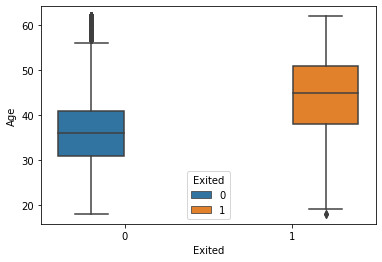

In [28]:
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df)

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

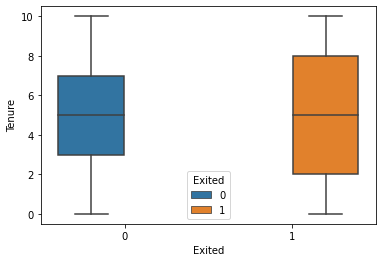

In [29]:
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df)

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

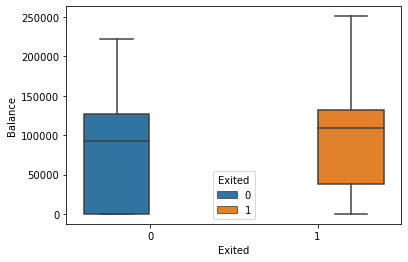

In [30]:
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df)

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

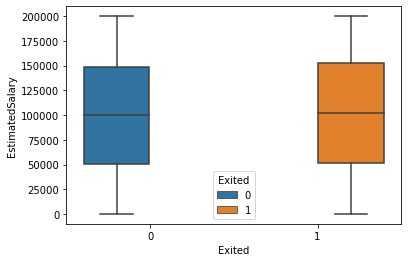

In [31]:
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df)

In [32]:
#There is no significant difference in the credit score distribution between retained and churned customers.
#The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories.
#The bank may need to review their target market or review the strategy for retention between the different age groups
#With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) 
#are more likely to churn compared to those that are of average tenure.
#Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
#Neither the product nor the salary has a significant effect on the likelihood to churn.

In [33]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
df['CreditScoreGivenAge'] = df.CreditScore/(df.Age)
df['TenureByAge'] = df.Tenure/(df.Age)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('Exited', axis = 1), df['Exited'], test_size = 0.30,  random_state = 10)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Exited', axis = 1))

StandardScaler()

In [37]:
X_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score,GridSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve, confusion_matrix,f1_score,recall_score,precision_score

C:\Users\kkvvk\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [39]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_resample(X_s,Y_train)

In [40]:
y_sm.shape

(11166,)

In [41]:
X_sm.shape

(11166, 16)

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, y_sm, test_size=.3,random_state=15,stratify=y_sm)

C:\Users\kkvvk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


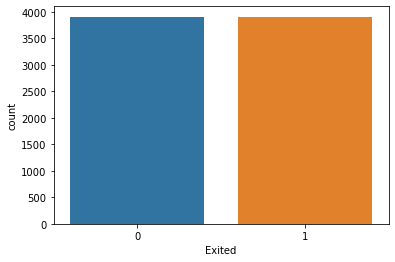

In [43]:
sns.countplot(Y_train)
plt.show()

In [44]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

LogisticRegression()

In [45]:
y_pred = logmodel.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [46]:
accuracy_score(Y_test,y_pred)

0.7686567164179104

In [47]:
roc_auc_score(Y_test,y_pred)

0.7686567164179106

In [48]:
f1_score(Y_test,y_pred)

0.7669172932330827

In [49]:
precision_score(Y_test,y_pred)

0.7727272727272727

In [50]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 5,criterion = 'entropy' , min_samples_split = 10)
clftree.fit(X_train, Y_train)
y_test_pred = clftree.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [51]:
accuracy_score(Y_test,y_test_pred)

0.7811940298507463

In [52]:
roc_auc_score(Y_test,y_test_pred)

0.7811940298507463

In [53]:
precision_score(Y_test,y_test_pred)

0.849406528189911

In [54]:
recall_score(Y_test,y_test_pred)

0.6835820895522388

               Feature  Importance
14  BalanceSalaryRatio    0.009173
5               Exited    0.024104
3              Balance    0.030077
13    IsActiveMember_1    0.037063
9      NumOfProducts_2    0.040799
12         HasCrCard_1    0.074225
1                  Age    0.366429
8          Gender_Male    0.404564


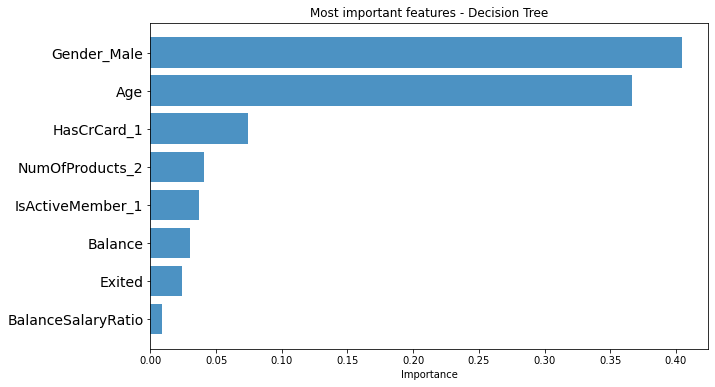

In [55]:
feature_names = df.columns
feature_imports = clftree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(8, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=25, criterion = "gini", min_samples_split=10 , n_jobs=-1 ,random_state=42)
rf_clf.fit(X_train, Y_train)
y_pred = rf_clf.predict(X_test)

In [57]:
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [58]:
accuracy_score(Y_test, rf_clf.predict(X_test))

0.8707462686567164

In [59]:
roc_auc_score(Y_test, rf_clf.predict(X_test))

0.8707462686567164

In [60]:
recall_score(Y_test, rf_clf.predict(X_test))

0.8674626865671642

In [61]:
precision_score(Y_test, rf_clf.predict(X_test))

0.8731971153846154

In [62]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)
params_grid = {"max_features" : [6,7,8,9,10],
              "min_samples_split": [2,6,10],
              }
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [6, 7, 8, 9, 10],
                         'min_samples_split': [2, 6, 10]},
             scoring='accuracy')

In [63]:
grid_search.best_params_

{'max_features': 6, 'min_samples_split': 2}

In [64]:
cvrf_clf = grid_search.best_estimator_
accuracy_score(Y_test, cvrf_clf.predict(X_test))

0.8832835820895523

In [65]:
roc_auc_score(Y_test, cvrf_clf.predict(X_test))

0.8832835820895523

In [66]:
recall_score(Y_test, cvrf_clf.predict(X_test))

0.8913432835820896

In [67]:
precision_score(Y_test, cvrf_clf.predict(X_test))

0.8772032902467685

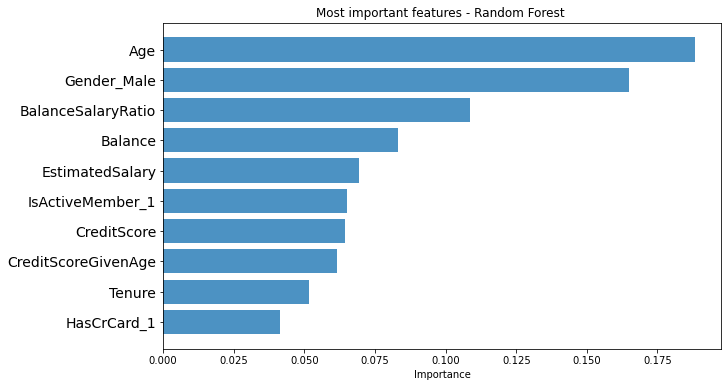

In [68]:
feature_names = df.columns 
feature_imports = cvrf_clf.feature_importances_ 
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance") 
most_imp_features.sort_values(by="Importance", inplace=True) 
plt.figure(figsize=(10,6)) 
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8) 
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14) 
plt.xlabel('Importance') 
plt.title('Most important features - Random Forest ') 
plt.show()

In [69]:
import xgboost as xgb

In [70]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3, n_jobs=-1)
xgb_clf.fit(X_train, Y_train)

C:\Users\kkvvk\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:06:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
accuracy_score(Y_test, xgb_clf.predict(X_test))

0.8967164179104478

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

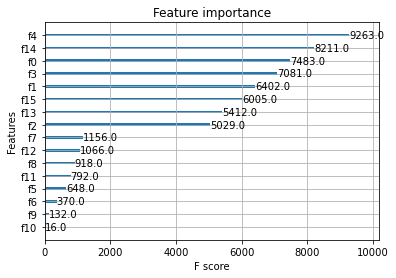

In [72]:
xgb.plot_importance(xgb_clf)

In [73]:
xgb_clf = xgb.XGBClassifier(n_estimators=250,learning_rate=0.1, random_state=42)

In [74]:
param_test1 = {
 'max_depth':range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[ 1e-2, 0.1, 1]
}

In [75]:
grid_search = GridSearchCV(xgb_clf, param_test1,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [76]:
grid_search.fit(X_train, Y_train)

C:\Users\kkvvk\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:22:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...one,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [77]:
cvxg_clf = grid_search.best_estimator_

In [78]:
accuracy_score(Y_test, cvxg_clf.predict(X_test))

0.9053731343283582

In [79]:
grid_search.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.2,
 'max_depth': 9,
 'reg_alpha': 0.01,
 'subsample': 0.9}

In [80]:
roc_auc_score(Y_test, cvxg_clf.predict(X_test))

0.9053731343283582

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

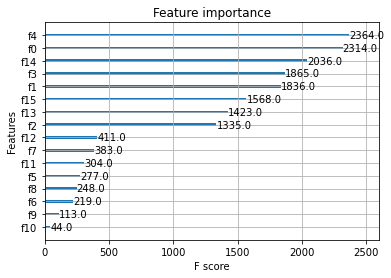

In [81]:
xgb.plot_importance(cvxg_clf)

In [82]:
recall_score(Y_test, cvxg_clf.predict(X_test))

0.8859701492537313

In [83]:
precision_score(Y_test, cvxg_clf.predict(X_test))

0.9217391304347826

In [84]:
f1_score(Y_test, cvxg_clf.predict(X_test))

0.9035007610350076